In [3]:
#import
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
plt.style.use('fivethirtyeight')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from mpl_toolkits.basemap import Basemap
import folium
import folium.plugins
from matplotlib import animation,rc
import io
import base64
from IPython.display import HTML, display
import warnings
warnings.filterwarnings('ignore')
# from scipy.misc import imread
from matplotlib.pyplot import imread
import codecs
from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8"))

C:\Users\ASUS\anaconda3\envs\AIrobot\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [10]:
# df.groupby("Year").sum()   # 숫자로 된 값만 찾아서 sum을 해줌 (index는 Year

# 데이터 준비

In [5]:
# 데이터 준비
terror=pd.read_csv('../data/globalterrorismdb_0617dist.csv',encoding='ISO-8859-1')
terror.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
terror=terror[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
terror['casualities']=terror['Killed']+terror['Wounded']
print(terror.columns)
terror.head()

Index(['Year', 'Month', 'Day', 'Country', 'Region', 'city', 'latitude',
       'longitude', 'AttackType', 'Killed', 'Wounded', 'Target', 'Summary',
       'Group', 'Target_type', 'Weapon_type', 'Motive', 'casualities'],
      dtype='object')


,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.432608,-99.133207,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0
3,1970,1,0,Greece,Western Europe,Athens,37.983773,23.728157,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives/Bombs/Dynamite,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,NaN


In [6]:
# 데이터에 NaN 값이 몇개인지 파악
terror.isnull().sum()    
# Motive에 없는 값이 많네?
# 사상자도 알 수 없는 것들이 많네?

Year                0
Month               0
Day                 0
Country             0
Region              0
city              446
latitude         4606
longitude        4606
AttackType          0
Killed           9682
Wounded         15325
Target            636
Summary         66138
Group               0
Target_type         0
Weapon_type         0
Motive         121764
casualities     15826
dtype: int64

In [7]:
# Motive에 어떤 것들이 있는지 알아보자.
terror[terror["Motive"].notnull()]

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
5,1970,1,1,United States,North America,Cairo,37.005105,-89.176269,Armed Assault,0.0,0.0,Cairo Police Headquarters,1/1/1970: Unknown African American assailants ...,Black Nationalists,Police,Firearms,To protest the Cairo Illinois Police Deparment,0.0
8,1970,1,2,United States,North America,Madison,43.076592,-89.412488,Facility/Infrastructure Attack,0.0,0.0,"R.O.T.C. offices at University of Wisconsin, M...","1/2/1970: Karl Armstrong, a member of the New ...",New Year's Gang,Military,Incendiary,To protest the War in Vietnam and the draft,0.0
9,1970,1,3,United States,North America,Madison,43.072950,-89.386694,Facility/Infrastructure Attack,0.0,0.0,Selective Service Headquarters in Madison Wisc...,"1/3/1970: Karl Armstrong, a member of the New ...",New Year's Gang,Government (General),Incendiary,To protest the War in Vietnam and the draft,0.0
11,1970,1,6,United States,North America,Denver,39.740010,-104.992259,Facility/Infrastructure Attack,0.0,0.0,"Army Recruiting Station, Denver Colorado",1/6/1970: Unknown perpetrators threw a Molotov...,Left-Wing Militants,Military,Incendiary,Protest the draft and Vietnam War,0.0
14,1970,1,9,United States,North America,Rio Piedras,18.399712,-66.049987,Facility/Infrastructure Attack,0.0,0.0,Baker's Store,1/9/1970: The Armed Commandos of Liberation c...,Armed Commandos of Liberation,Business,Incendiary,To protest United States owned businesses in P...,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170305,2016,12,30,Afghanistan,South Asia,Puli Alam,33.999938,69.019532,Unknown,1.0,0.0,Brother of Officer: Qari Zubai,12/30/2016: Assailants attacked and killed Qar...,Unknown,Police,Unknown,"The specific motive is unknown; however, sourc...",1.0
170309,2016,12,30,Nigeria,Sub-Saharan Africa,Dan Mayan,10.241977,6.252329,Hostage Taking (Kidnapping),1.0,NaN,Community,12/30/2016: Assailants raided Dan Mayans commu...,Boko Haram,Private Citizens & Property,Firearms,"The specific motive is unknown; however, sourc...",NaN
170310,2016,12,30,Nigeria,Sub-Saharan Africa,Dogongona,10.241977,6.252329,Hostage Taking (Kidnapping),1.0,NaN,Community,12/30/2016: Assailants raided Dogongona commun...,Boko Haram,Private Citizens & Property,Firearms,"The specific motive is unknown; however, sourc...",NaN
170321,2016,12,31,Bangladesh,South Asia,Sundarganj,25.564362,89.519090,Assassination,1.0,0.0,Member of Parliament: Manzurul Islam Liton,12/31/2016: Assailants shot and killed Manzuru...,Jamaat-E-Islami (Bangladesh),Government (General),Firearms,"The specific motive is unknown; however, sourc...",1.0


# Step 1
* 먼저 데이터의 전체 기간에서 테러의 숫자를 연도별로 집계하여 연도별 테러 숫자를 시각화
* 시각화를 해보면 전세계 테러는 어떤 특정 연도를 기점으로 갑자기 급격히 증가합니다. 이 구간을 특정짓고 그 “기점”에 세계적 이슈가 무엇이 있었는지를 추측

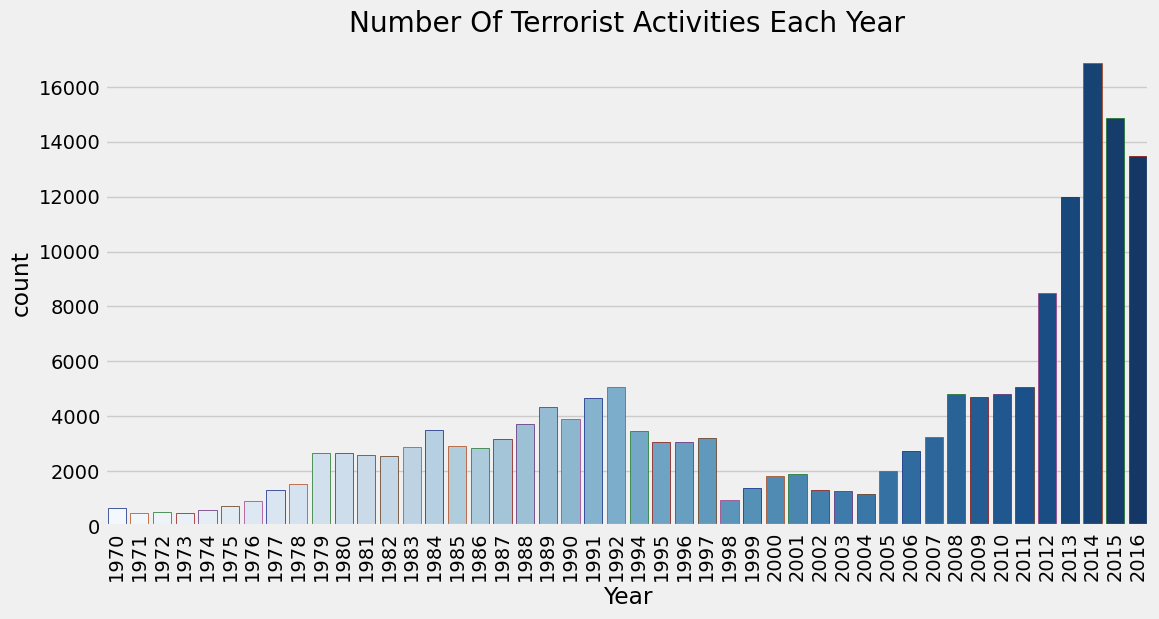

In [8]:
plt.subplots(figsize=(12,6))
sns.countplot('Year', data=terror, palette='Blues', edgecolor=sns.color_palette('dark',7))
# sns.lmplot(x="Year", y="Count", data=terror_year_count)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

In [9]:
terror["Count"] = 1
terror.head()

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities,Count
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0,1
1,1970,0,0,Mexico,North America,Mexico city,19.432608,-99.133207,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0,1
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0,1
3,1970,1,0,Greece,Western Europe,Athens,37.983773,23.728157,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives/Bombs/Dynamite,NaN,NaN,1
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,NaN,1


In [10]:
terror_year_count = pd.pivot_table(terror, index=["Year"], aggfunc=np.sum)
terror_year_count.drop(columns=['Day', 'Killed', 'Month', 'Wounded', 'casualities', 'latitude',
       'longitude'], inplace=True)

terror_year_count

,Count
Year,
1970,651
1971,470
1972,496
1973,473
1974,580
1975,740
1976,923
1977,1319
1978,1526


<AxesSubplot:ylabel='Year'>

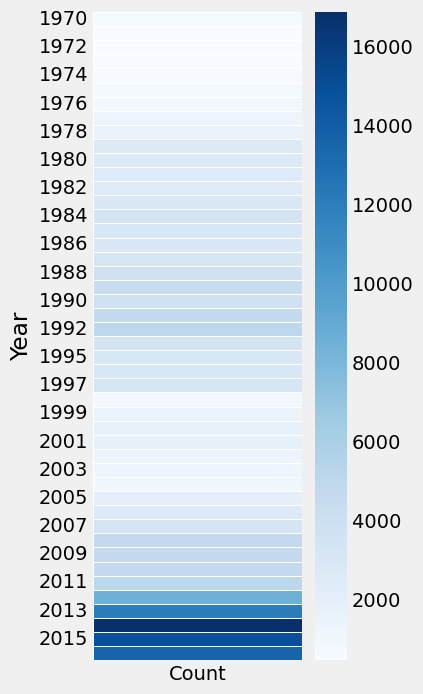

In [11]:
# heatmap으로 급격히 변하는 지점 찾기
plt.figure(figsize=(3,8))
sns.heatmap(terror_year_count, linewidths=.5, cmap="Blues")

# Step 2
* 전 세계 테러 데이터를 가지고, 테러가 많이 일어난 국가를 정렬해서 상위 10위의 국가를 시각화

In [12]:
terror["Region"]

0         Central America & Caribbean
1                       North America
2                      Southeast Asia
3                      Western Europe
4                           East Asia
                     ...             
170345             Sub-Saharan Africa
170346                 Southeast Asia
170347             Sub-Saharan Africa
170348                  North America
170349             Sub-Saharan Africa
Name: Region, Length: 170350, dtype: object

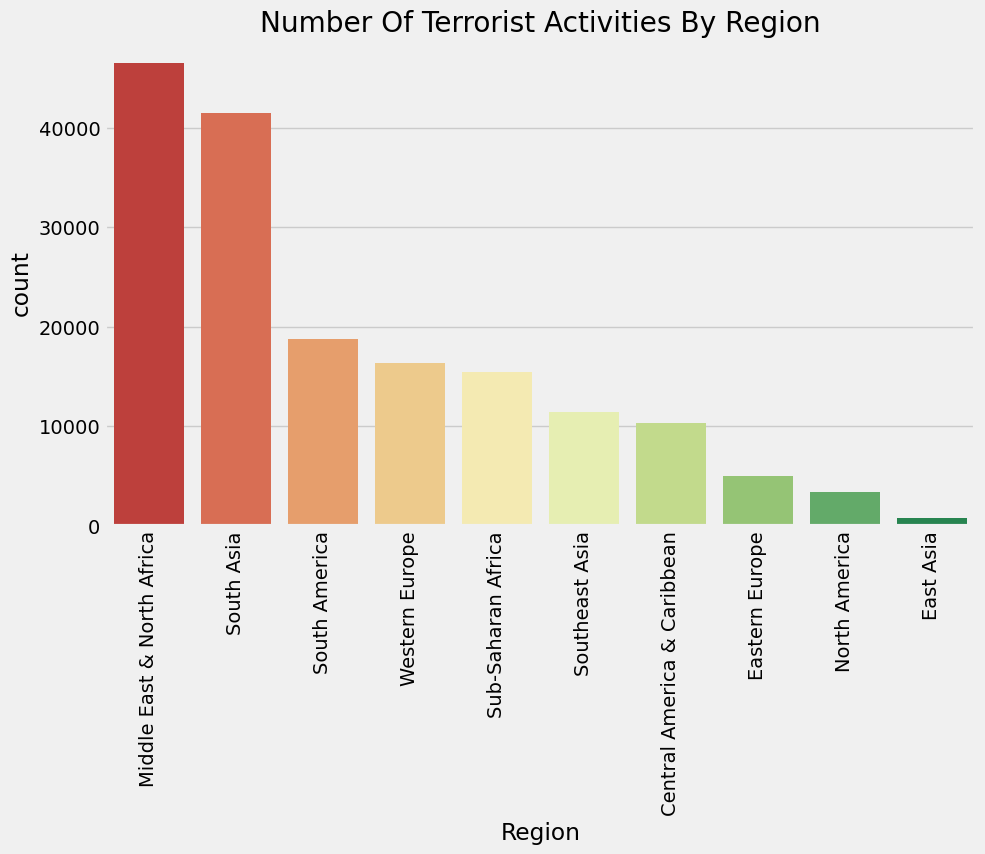

In [13]:
# 테러가 많이 일어난 국가 top10
plt.subplots(figsize=(10,6))
sns.countplot('Region',data=terror, order=terror['Region'].value_counts().index[:10], palette='RdYlGn')#,edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities By Region')
plt.show()

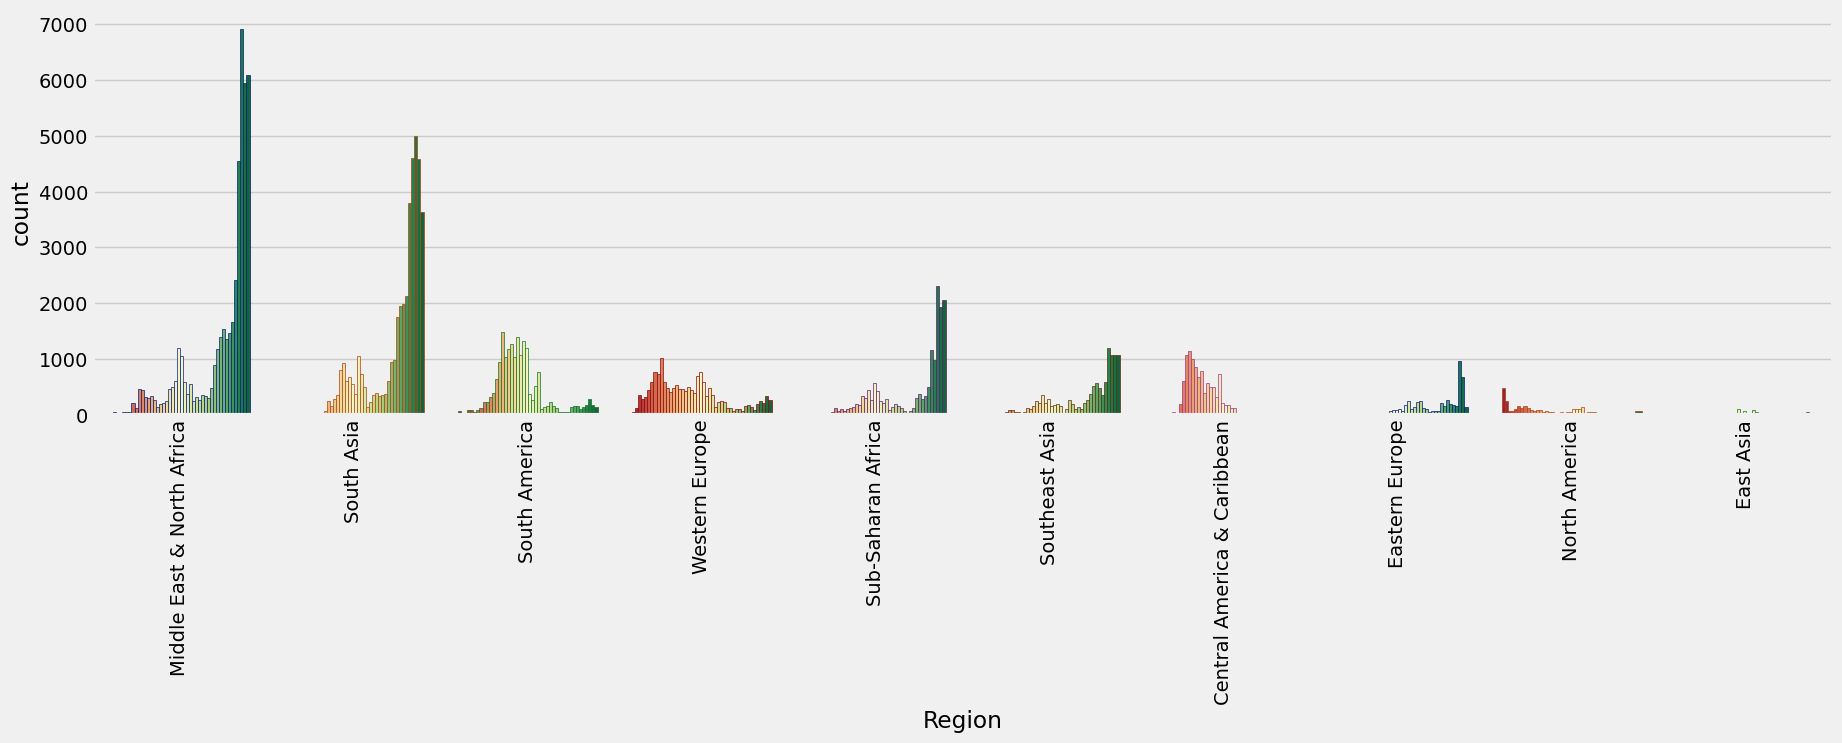

In [14]:
# 상위 10위, 년도별 
plt.subplots(figsize=(20,5))
sns.countplot('Region',data=terror,palette='RdYlGn', hue="Year",edgecolor=sns.color_palette('dark',7),order=terror['Region'].value_counts().index[:10])
plt.legend([],[],frameon=False)
plt.xticks(rotation=90)
plt.show()
# 시리아 내전 -2011년
# 911 테러 - 2001년

# Step 3
* 문제2의 전 세계 테러가 일어난 횟수별 상위 10위 국가에 대해 국가별로 사망자 수와 부상자 수를 구분하여 시각화하시오.
* 만약 국가별로 다른 국가와 사망자수, 부상자수의 특성이 다른 국가들이 있다면 시각화에 신경을 쓰세요.
* 즉, 어떤 국가는 테러횟수와 사상자(사망자수+부상자수)가 비슷한 경우가 있고, 또 어떤 국가는 테러횟수에 비해 사상자수가 많은 경우가 있을 겁니다

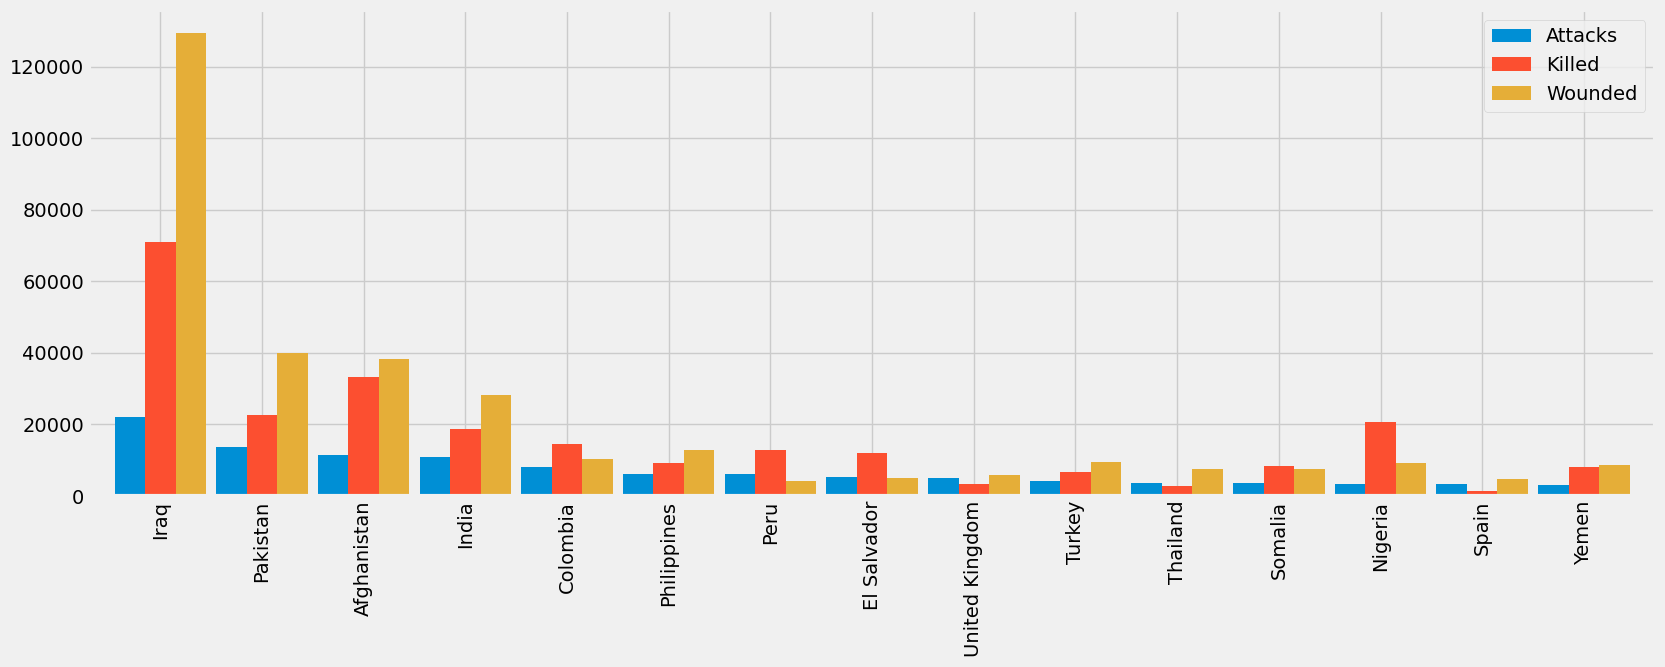

In [15]:
# 나라별로 테러가 몇번 일어났는지 숫자를 센다.
coun_terror=terror['Country'].value_counts()[:15].to_frame()
coun_terror.columns=['Attacks']

# index가 country, column이 'killed의 합' 데이터를 만든다. 그 다음에 'wounded의 합'만든다.
coun_kill=terror.groupby('Country')['Killed'].sum().to_frame()             
coun_wounded=terror.groupby('Country')["Wounded"].sum().to_frame()

# 컬럼들을 합친다
coun_terror = coun_terror.merge(coun_kill,left_index=True,right_index=True,how='left')
coun_terror = coun_terror.merge(coun_wounded,left_index=True,right_index=True,how='left')

# bar 형태로 그림
coun_terror.plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

# Step 4.
* 중동&북아프리카, 남아시아, 남아메리카, 서유럽, 남동아시아, 동유럽, 북아메리카, 동아시아 지역으로 구분하여 각 지역별로 테러 공격 형태, 사망자와 사상자의 수 등에 대해 각 지역별로 특성들이 있는지를 확인하세요
* 여러분들은 데이터를 충분히 관찰하면서 신중하게 결과를 정리하세요

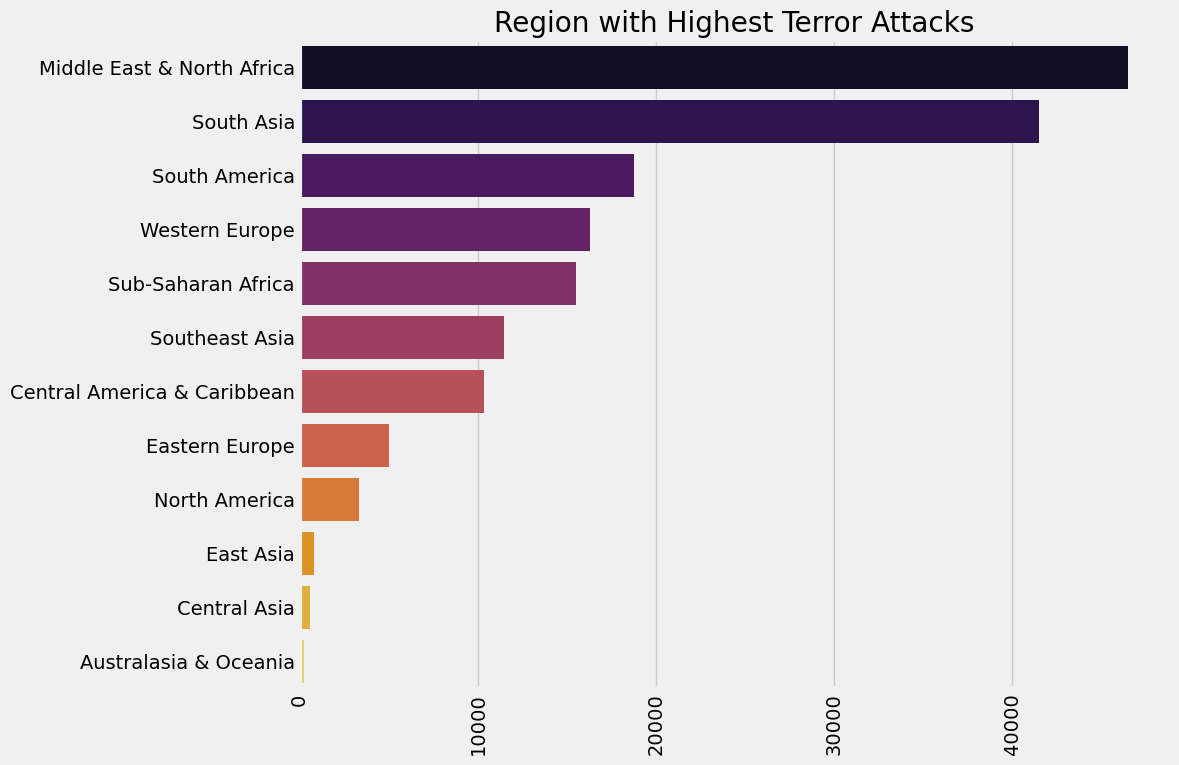

In [16]:
# 다시 어느 Region에서 테러가 많이 발생했는지 봄

sns.barplot(terror['Region'].value_counts()[:].values, terror['Region'].value_counts().index,palette=('inferno'))
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Region with Highest Terror Attacks')
plt.show()

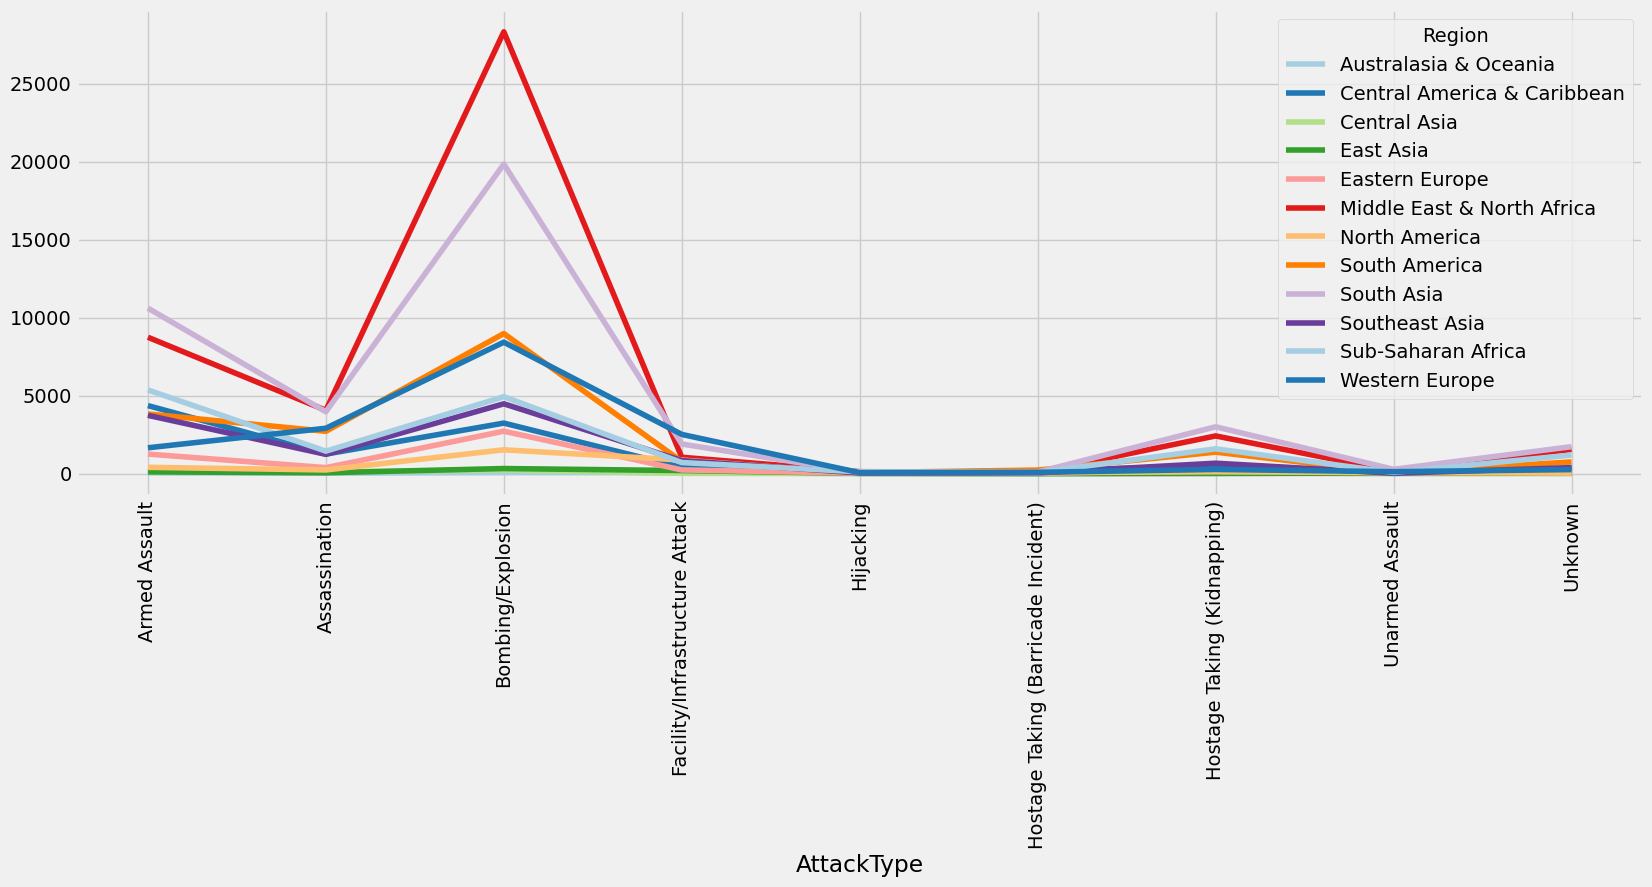

In [17]:
# 각 지역별로 테러 공격 형태
top_groups10 = terror[terror['Region'].isin(terror['Region'].value_counts().index)]
pd.crosstab(top_groups10.AttackType,top_groups10.Region).plot(color=sns.color_palette('Paired',10))
fig = plt.gcf()
fig.set_size_inches(18,6)
plt.xticks(rotation=90)
plt.show()

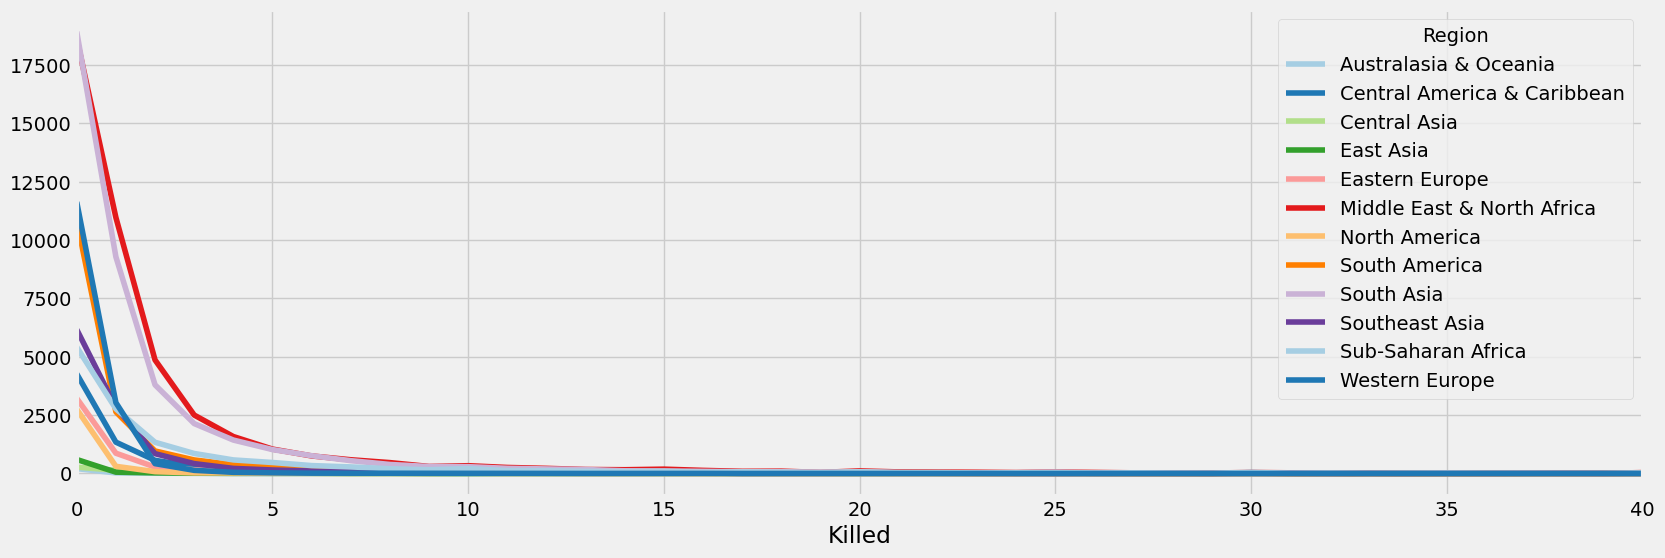

In [18]:
# 테러가 일어날 때 사망자수
# 한번 테러가 일어날 때 약 10명 이하의 사망자 발생
top_groups10=terror[terror['Region'].isin(terror['Region'].value_counts().index)]
pd.crosstab(top_groups10.Killed,top_groups10.Region).plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.xlim([0,40])
plt.show()

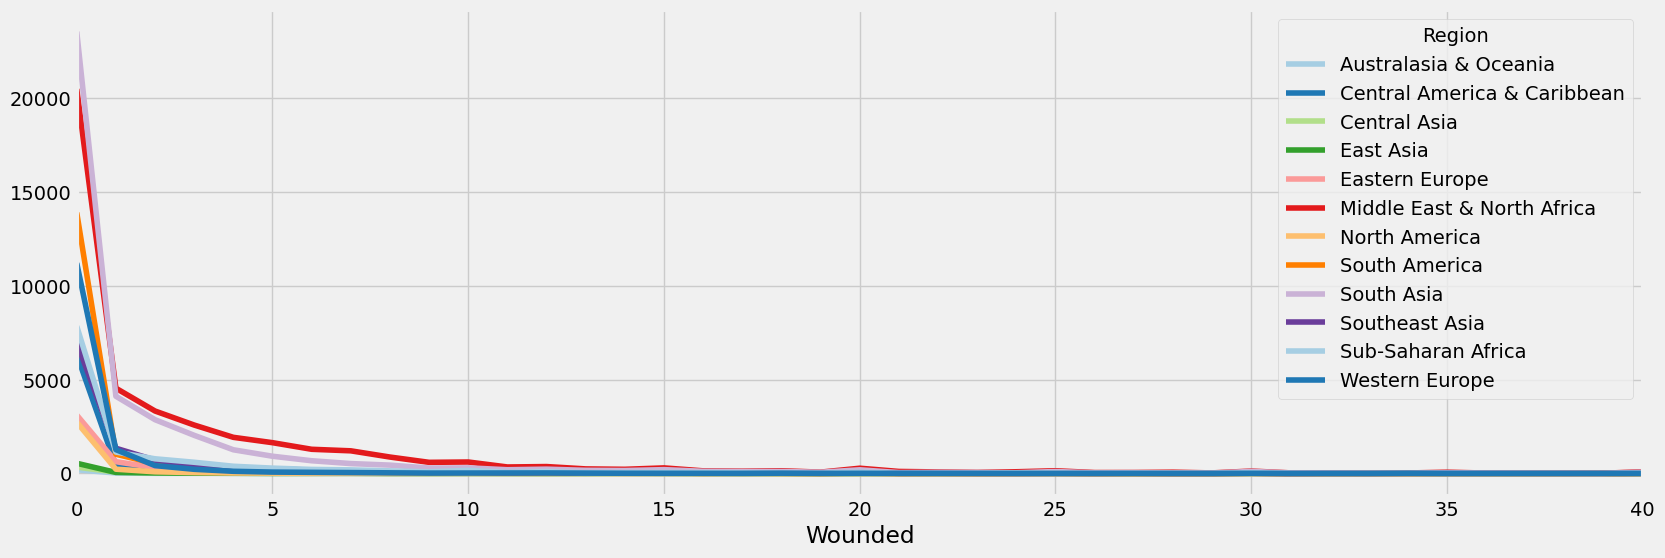

In [19]:
# 테러가 일어날 때 부상자수
# 부상자만 발생하는 경우도 있음
top_groups10=terror[terror['Region'].isin(terror['Region'].value_counts().index)]
pd.crosstab(top_groups10.Wounded,top_groups10.Region).plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.xlim([0,40])
plt.show()

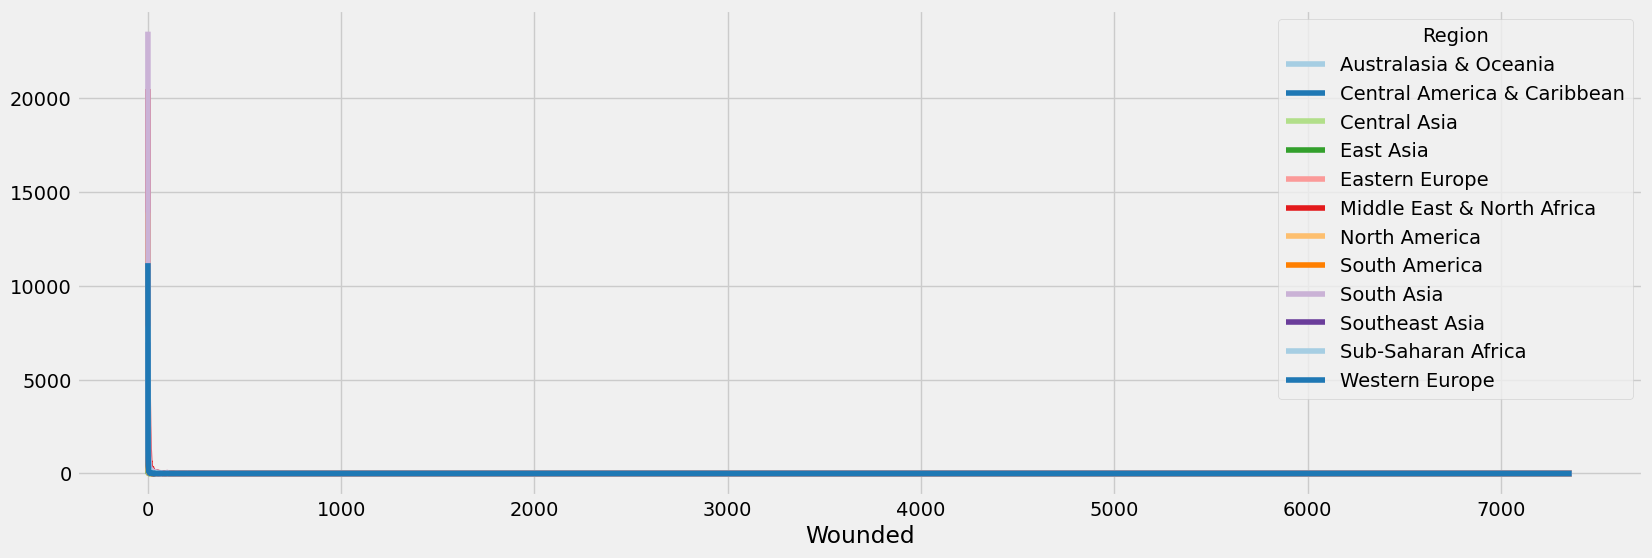

In [20]:
# x축 lim 없앰
top_groups10=terror[terror['Region'].isin(terror['Region'].value_counts().index)]
pd.crosstab(top_groups10.Wounded,top_groups10.Region).plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
# plt.xlim([0,40])
plt.show()

# 7000이상의 부상자 발생

In [21]:
# 부상자수를 내림차순으로
top_groups10.Wounded.sort_values(ascending=False)

73054     7366.0
73055     7365.0
58770     5500.0
67999     4000.0
159418    1500.0
           ...  
170282       NaN
170309       NaN
170310       NaN
170315       NaN
170347       NaN
Name: Wounded, Length: 170350, dtype: float64

In [22]:
# 부상자가 7366명이 발생한 사건은? 
terror.loc[73054]

Year                                                        2001
Month                                                          9
Day                                                           11
Country                                            United States
Region                                             North America
city                                               New York City
latitude                                               40.712784
longitude                                             -74.005941
AttackType                                             Hijacking
Killed                                                    1383.0
Wounded                                                   7366.0
Target         Passengers and crew members on American Airlin...
Summary        09/11/2001: This was one of four related attac...
Group                                                   Al-Qaida
Target_type                          Private Citizens & Property
Weapon_type    Vehicle (n

# Step 5
* 중동&북아프리카, 남아시아, 남아메리카, 서유럽, 남동아시아, 동유럽, 북아메리카, 동아시아 지역으로 구분하여 진행한 문제4번에 대해 문제1번에서 특정 지은 시기를 기준으로 다시 분리하여 테러의 양상을 분석해 보시오.
* 그리고 본인의 분석결과를 제시하시오

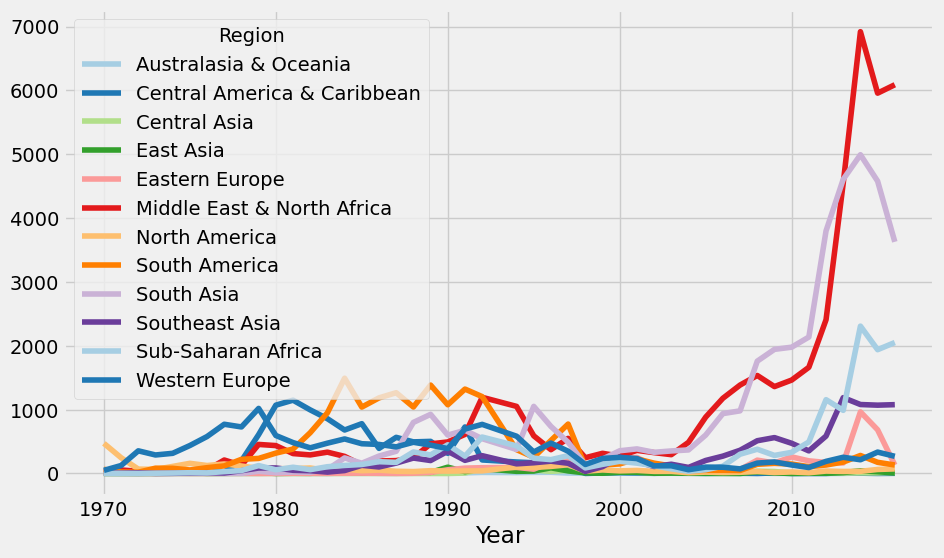

In [23]:
# 연도에 따른 각 지역별 테러 발생 수
top_groups=terror[terror['Region'].isin(terror['Region'].value_counts().index)]
pd.crosstab(top_groups.Year,top_groups.Region).plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

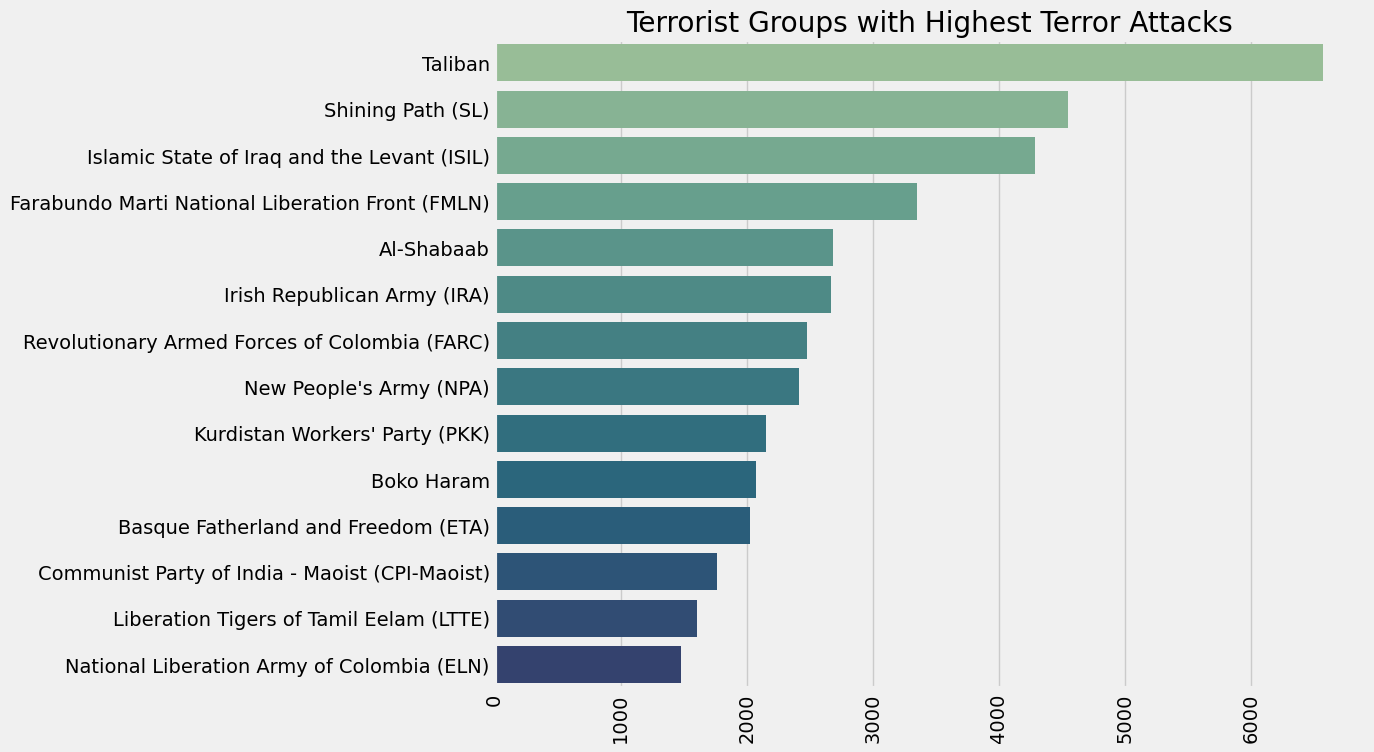

In [24]:
# 테러 단체
sns.barplot(terror['Group'].value_counts()[1:15].values,terror['Group'].value_counts()[1:15].index,palette=('crest'))
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Terrorist Groups with Highest Terror Attacks')
plt.show()

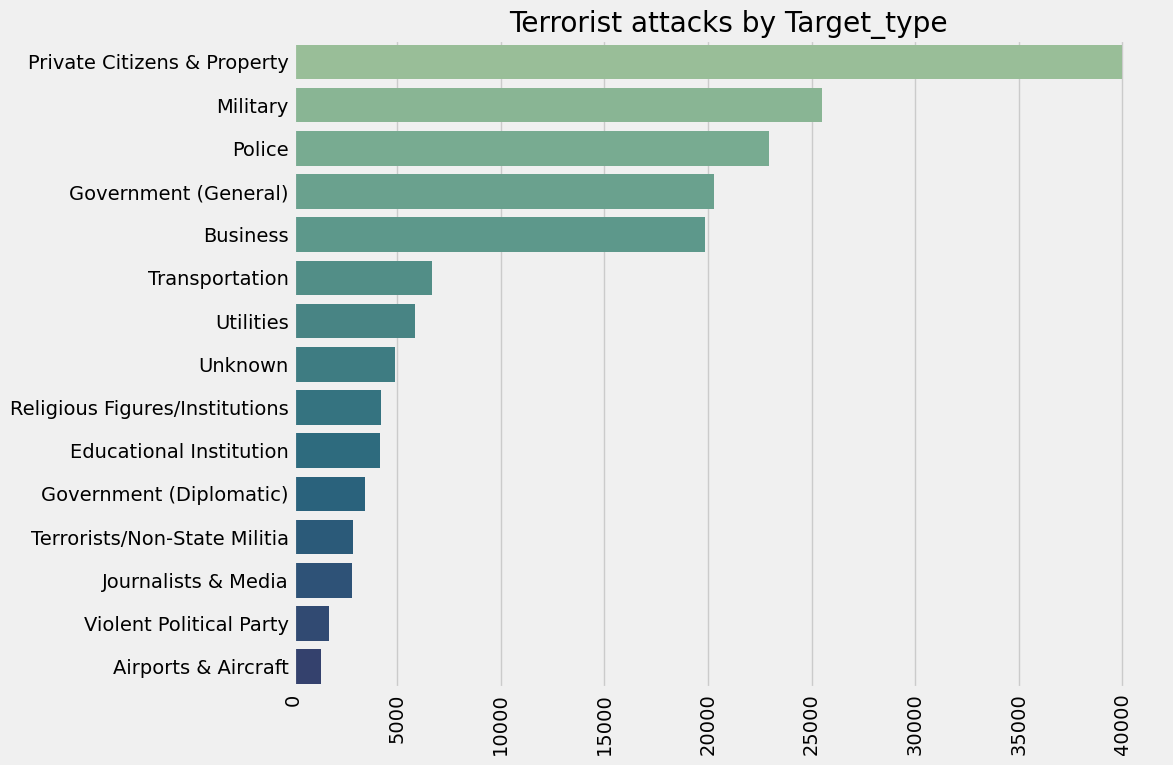

In [26]:
# 시민들이 가장 많은 피해를 봄
sns.barplot(terror['Target_type'].value_counts()[:15].values,terror['Target_type'].value_counts()[:15].index,palette=('crest'))
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Terrorist attacks by Target_type')
plt.show()

* 테러가 2000년대를 기점으로 급상승함
* Shining Path(SL) - 페루(남아메리카), FMLN (중미지역)은 2000년대 전에 주로 활동했던 국가
* 1, 3위인 Taliban, ISIL 등 중동 지역 단체들이 2000년대부터 활발히 활동함
* 테러 유형은 폭탄, 무장세력, 암살 순이며 시민을 주대상으로 하는 무차별 테러

# Step 6
* 테러의 위험성을 알릴 수 있는 효과적인 시각화 방법을 고민해보시오

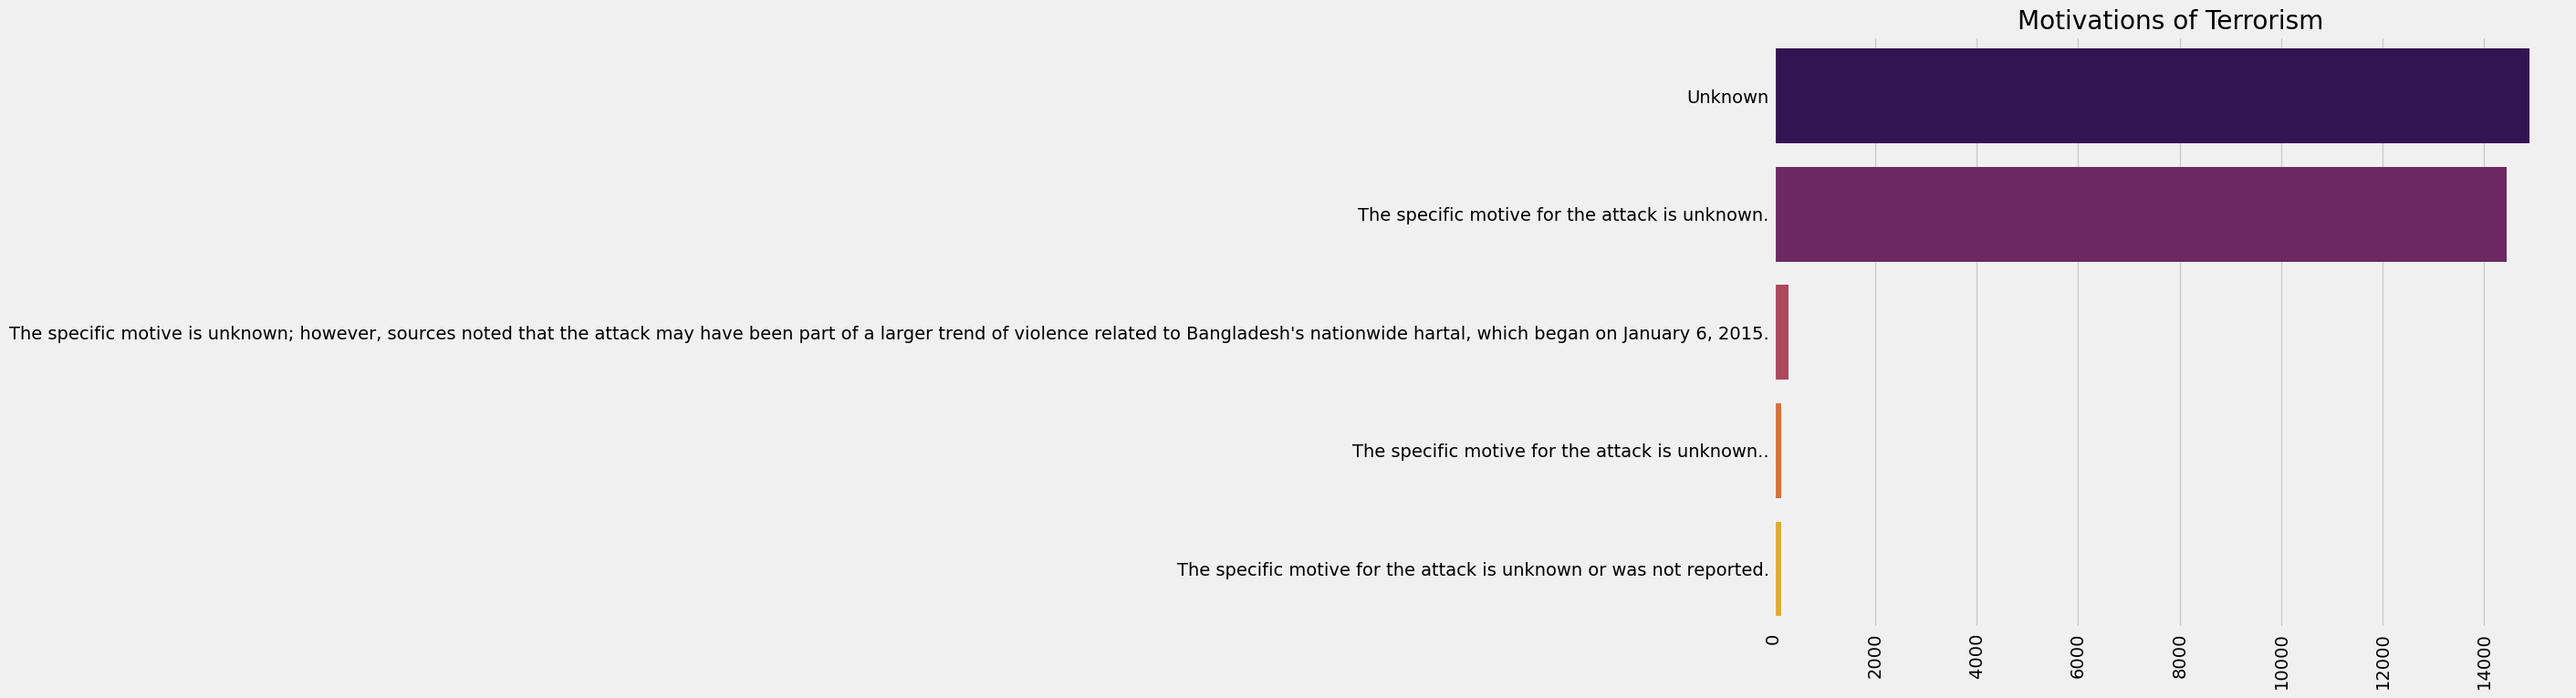

In [25]:
# 대부분의 테러 동기를 찾을 수 없음
sns.barplot(terror['Motive'].value_counts()[:5].values,terror['Motive'].value_counts()[:5].index,palette=('inferno'))
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Motivations of Terrorism')
plt.show()

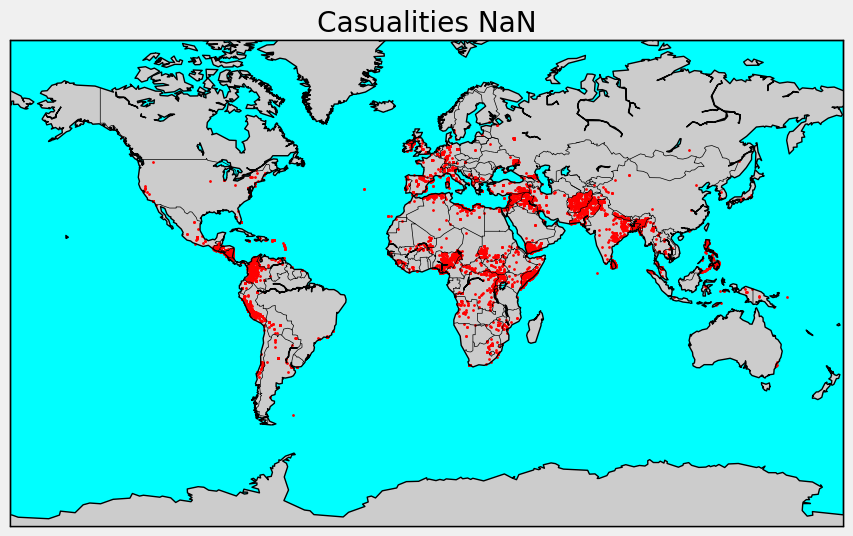

In [45]:
# 
m3 = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c',lat_0=True,lat_1=True)
lat_100=list(terror[terror['casualities'].isnull()].latitude)
long_100=list(terror[terror['casualities'].isnull()].longitude)
x_100,y_100=m3(long_100,lat_100)
m3.plot(x_100, y_100,'go',markersize=1,color = 'r')

m3.drawcoastlines()
m3.drawcountries()
m3.fillcontinents(lake_color='aqua')
m3.drawmapboundary(fill_color='aqua')
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.title('Casualities NaN')
# plt.legend(loc='lower left',handles=[
#                     mpatches.Patch(color='red',label='NaN')])
plt.show()

In [33]:
terror[terror['casualities'].isnull()]

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities,Count
3,1970,1,0,Greece,Western Europe,Athens,37.983773,23.728157,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives/Bombs/Dynamite,NaN,NaN,1
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,NaN,1
15,1970,1,10,East Germany (GDR),Eastern Europe,East Berlin,52.516667,13.400000,Bombing/Explosion,NaN,NaN,Jurists Ball (Palais au Frankturm),NaN,Commune 1,Government (General),Explosives/Bombs/Dynamite,NaN,NaN,1
34,1970,1,28,East Germany (GDR),Eastern Europe,East Berlin,52.516667,13.400000,Facility/Infrastructure Attack,NaN,NaN,Residence of President of Penal Office,NaN,Unknown,Police,Incendiary,NaN,NaN,1
59,1970,2,10,West Germany (FRG),Western Europe,Munich,48.139126,11.580186,Armed Assault,1.0,NaN,El Al Passenger Bus & Airport Lounge,NaN,Popular Front for the Liberation of Palestine ...,Airports & Aircraft,Firearms,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170315,2016,12,31,Afghanistan,South Asia,Chaghatak,35.957710,64.745883,Armed Assault,1.0,NaN,Village,12/31/2016: Assailants attacked Chaghatak vill...,Taliban,Private Citizens & Property,Firearms,NaN,NaN,1
170316,2016,12,31,Afghanistan,South Asia,Bukhari Qala,35.856925,64.506511,Armed Assault,NaN,1.0,Village,12/31/2016: Assailants attacked Bukhari Qala v...,Taliban,Private Citizens & Property,Firearms,NaN,NaN,1
170317,2016,12,31,Afghanistan,South Asia,Band-e Abgardan,35.842058,64.539948,Armed Assault,NaN,1.0,Village,12/31/2016: Assailants attacked Band-e Abgarda...,Taliban,Private Citizens & Property,Firearms,NaN,NaN,1
170337,2016,12,31,Iraq,Middle East & North Africa,Mosul,36.352632,43.190460,Bombing/Explosion,NaN,0.0,Forces,12/31/2016: Security forces intercepted and ki...,Islamic State of Iraq and the Levant (ISIL),Military,Explosives/Bombs/Dynamite,NaN,NaN,1


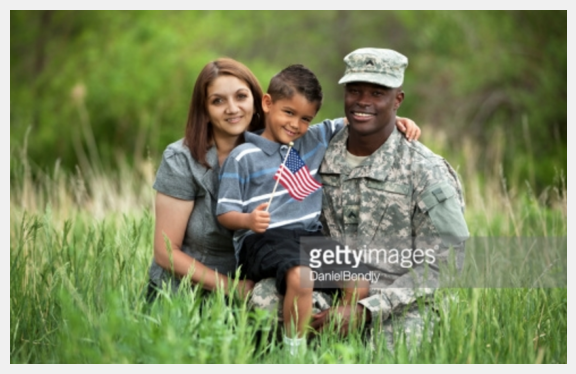

In [37]:
# 무차별 테러에 의해 가족들이 피해를 입을 수 있음
img1 = imread("../data/27246C40571681F91B.png")
plt.grid(False)
plt.axis('off')
plt.imshow(img1)